In [150]:
import matplotlib as mplt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [93]:
df1 = pd.read_csv('results2.csv')

In [117]:
df_size = df1.loc[(df1.wrapper == "get_file_size").nonzero()[0][0]:df1.size,['genome','wrapper']]
df_compression = df1.loc[6:19,:]
df_info = pd.read_csv('Genomes_Info.csv').loc[:,['ID','Kingdom']]

/Users/boreas/programming/genomecompression/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


In [133]:
df_size.rename(index=str, columns={'wrapper':'size'},inplace=True)
df_compression['max'] = df_compression.loc[:,df_compression.columns[1:]].max(axis=1)

/Users/boreas/programming/genomecompression/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [135]:
df_compression = df_compression.loc[:,['genome', 'max']]

In [136]:
df_merged = df_compression.merge(df_info, left_on='genome', right_on='ID')

In [138]:
df_merged = df_merged.merge(df_size, left_on='genome', right_on='genome')
df_merged

,genome,max,ID,Kingdom,size
0,1OsHimlxsGE1D3M5tNXTAbnOuq9UAmN2k,5.487046,1OsHimlxsGE1D3M5tNXTAbnOuq9UAmN2k,Animal,773947682
1,1s9dNf0i3kbW88HIVaeDppT7JILDgL2wo,3.841810,1s9dNf0i3kbW88HIVaeDppT7JILDgL2wo,Bacteria,587405
2,1bj4eybCY3XwujjYIKilegdtbj1q2pJ_C,4.216932,1bj4eybCY3XwujjYIKilegdtbj1q2pJ_C,Bacteria,176175
3,1YKRVGYUeRgxUd-F7B60Vz_dk7s57ZEhu,2.531375,1YKRVGYUeRgxUd-F7B60Vz_dk7s57ZEhu,Virus,1896
4,1uGIi-4pfOoiZlIsTexPhuRrK81QW69_t,4.163944,1uGIi-4pfOoiZlIsTexPhuRrK81QW69_t,Protist,34565107
5,14YFBUNfKdmrlHVz09x1vSTBFhP36BU0N,4.059901,14YFBUNfKdmrlHVz09x1vSTBFhP36BU0N,Animal,1700386327
6,1f5rSSt1DS0_mm6XrH-KiCUKbi1koUdy6,3.699358,1f5rSSt1DS0_mm6XrH-KiCUKbi1koUdy6,Fungi,12319017
7,1nfmlUw8nIaH4VcltO7onFsouI9K-WzdY,4.068359,1nfmlUw8nIaH4VcltO7onFsouI9K-WzdY,Animal,369205819
8,1A_SQ89QyeiR_uhFSIvMQWReYv3jt6MAP,4.208002,1A_SQ89QyeiR_uhFSIvMQWReYv3jt6MAP,Animal,2854236832
9,1xqUdvYJ8_2qRZZ8VhkSI2aDeRTNmcvQt,4.174073,1xqUdvYJ8_2qRZZ8VhkSI2aDeRTNmcvQt,Animal,3298128101


In [145]:
color_map = {'Animal':'Blue', 'Plant': 'Green', 'Bacteria': 'Yellow', 'Virus': 'Purple', 'Protist': 'Orange', 'Fungi': 'Brown'}
colors = df_merged.Kingdom.map(lambda x: color_map[x])

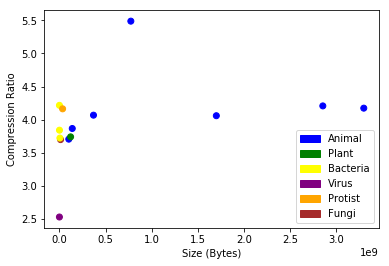

In [171]:
plt.scatter(df_merged['size'].astype(int).values, df_merged['max'].values, c=colors  )
plt.xlabel('Size (Bytes)')
plt.ylabel('Compression Ratio')
plt.legend(handles=[mplt.patches.Patch(color=color_map[c], label=c) for c in color_map.keys()])

In [170]:
[mplt.patches.Patch(color=color_map[c], label=c) for c in color_map.keys()]